In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.set_cmap(plt.cm.Paired)

<Figure size 432x288 with 0 Axes>

In [2]:
import numpy as np

from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=20, # 20個生成
                  n_features=2, # 2次元
                  centers=2,    # クラスタ中心2個
                  cluster_std = 2, # クラスタの大きさ（標準偏差）
                  random_state=3   # 乱数種（再現用）
                 )

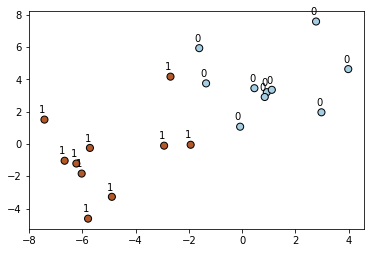

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='k'); # 2次元散布図でプロット
for l, dx, dy in zip(y, X[:,0], X[:, 1]):
    plt.annotate(l, xy=(dx-0.2, dy+0.4))

In [ ]:
# 境界線を引く関数の定義

def plotBoundary(X, clf, mesh=True, boundary=True, type='predict', clim=(None, None)):

    # plot range
    x_min = min(X[:,0])
    x_max = max(X[:,0])
    y_min = min(X[:,1])
    y_max = max(X[:,1])

    # visualizing decision function
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j] # make a grid
    
    if type == 'predict':
        Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])
    else: # 'value', 'probability'
        Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    
    Z = Z.reshape(XX.shape) # just reshape

    if mesh:
        if type == 'predict':
            plt.pcolormesh(XX, YY, Z, zorder=-10)
        else:
            if type == "probability":
                Z = 1 / (1 + np.exp(-Z)) # sigmoid
            plt.pcolormesh(XX, YY, Z, zorder=-10, cmap=plt.cm.bwr)
            plt.colorbar()
            plt.clim(clim[0], clim[1])

    if boundary:
        level = [0]
        if type == "probability":
            level = [0.5]
        plt.contour(XX, YY, Z, 
                    colors='k', linestyles='-', levels=level)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

In [ ]:
clf.fit(X,y)

plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k') # 2次元散布図でプロット

plotBoundary(X, clf) # 境界線の描画

In [ ]:
X, y = make_blobs(n_samples=20, # 20個生成
                  n_features=2, # 2次元
                  centers=2,    # クラスタ中心2個
                  cluster_std =1, # クラスタの大きさ（標準偏差）
                  random_state=8   # 乱数種（再現用）
                 )
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='k'); # 2次元散布図でプロット

In [ ]:

clf = LogisticRegression()

clf.fit(X,y)

plotBoundary(X, clf)
    
plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k')

In [ ]:
X, y = make_blobs(n_samples=20, # 20個生成
                  n_features=2, # 2次元
                  centers=2,    # クラスタ中心2個
                  cluster_std =1, # クラスタの大きさ（標準偏差）
                  random_state=7   # 乱数種（再現用）
                 )

clf = LogisticRegression()

clf.fit(X,y)

plotBoundary(X, clf)
    
plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k')

In [ ]:
X, y = make_blobs(n_samples=20, # 20個生成
                  n_features=2, # 2次元
                  centers=2,    # クラスタ中心2個
                  cluster_std =1, # クラスタの大きさ（標準偏差）
                  random_state=4   # 乱数種（再現用）
                 )

clf = LogisticRegression()

clf.fit(X,y)

plotBoundary(X, clf)
    
plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k')

In [ ]:
from IPython.display import HTML
HTML('<iframe scrolling="no" src="https://www.geogebra.org/material/iframe/id/Nc8s96Sc/width/903/height/549/border/888888/sri/true/sdz/true" width="903px" height="549px" style="border:0px;"> </iframe>')

In [ ]:
from IPython.display import HTML
HTML('<iframe scrolling="no" src="https://www.geogebra.org/material/iframe/id/Ge9pjBJU/width/930/height/450/border/888888/sri/true/sdz/true" width="930px" height="450px" style="border:0px;"> </iframe>')

In [ ]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
y = data.target

In [ ]:
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(n_splits=1, 
                  train_size=0.8, 
                  test_size=0.2, 
                  random_state=0)

train_index, test_index = next(ss.split(X, y))

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

In [ ]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

In [ ]:
clf.C = 1e-3
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

In [ ]:
clf

In [ ]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
clf.predict(X_test)

In [ ]:
X_test_value = clf.decision_function(X_test)

In [ ]:
X_test_value

In [ ]:
plt.plot(np.sort(X_test_value))
plt.plot([0, 120], [0, 0], linestyle='--')

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

plt.plot(np.sort(sigmoid(X_test_value)))

plt.plot([0, 120], [0.5, 0.5], linestyle='--')
plt.ylim(0,1)

In [ ]:
X, y = make_blobs(n_samples=20, # 20個生成
                  n_features=2, # 2次元
                  centers=2,    # クラスタ中心2個
                  cluster_std = 2, # クラスタの大きさ（標準偏差）
                  random_state=3   # 乱数種（再現用）
                 )
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='k'); # 2次元散布図でプロット

In [ ]:
clf = LogisticRegression()

clf.fit(X,y)

plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k') # 2次元散布図でプロット

plotBoundary(X, clf) # 境界線の描画

In [ ]:
plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k') # 2次元散布図でプロット

plotBoundary(X, clf, type="value", clim=(-10, 10))

In [ ]:
plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k') # 2次元散布図でプロット

plotBoundary(X, clf, type="probability", clim=(0, 1))

X_value = clf.decision_function(X)

for l, dx, dy in zip(X_value, X[:,0], X[:, 1]):
    plt.annotate("{0:.2f}".format(sigmoid(l)), xy=(dx-0.4, dy+0.4))

In [ ]:
X, y = make_blobs(n_samples=20, # 20個生成
                  n_features=2, # 2次元
                  centers=2,    # クラスタ中心2個
                  cluster_std =1, # クラスタの大きさ（標準偏差）
                  random_state=4   # 乱数種（再現用）
                 )

clf = LogisticRegression()

clf.fit(X,y)
   
plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k')

X_value = clf.decision_function(X)

plotBoundary(X, clf, type="probability", clim=(0, 1))

for l, dx, dy in zip(X_value, X[:,0], X[:, 1]):
    plt.annotate("{0:.2f}".format(sigmoid(l)), xy=(dx-0.2, dy+0.2))